# Ober- und Untersumme

In [1]:
import numpy as np
np.set_printoptions(precision=2, linewidth=65)

import matplotlib.pyplot as plt
plt.rc('figure', dpi=150)

import seaborn as sns
sns.set()
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})


Eine der grundlegendsten Arten Integrale von Funktionen zu bestimmen sind die [Ober- und Untersumme](https://de.wikipedia.org/wiki/Riemannsches_Integral). Sie nähern den Integralwert durch eine Abschätzung nach oben bzw. unten an. Mit einer steigenden Anzahl von Stützstellen, d.h. Positionen an welchen die Funktion ausgewertet wird, konvergieren beide Abschätzungen gegen den Integralwert.

## Definition

Für die Bildung der Ober- und Untersumme, werden gleichmäßig verteilte Stützstellen auf dem Intervall $\sf [a,b]$ benötigt. Werden $\sf n+1$ Stützstellen gewählt, so gilt:

$$ a = x_0 < x_1 < \cdots < x_n = b $$

Der Abstand der Stützstellen beträgt $\sf \Delta x = (b-a)/(n-1)$. Auf jedem der $\sf n$ Teilintervalle $\sf [x_{i-1}, x_{i}]$ wird nun der maximale bzw. minimale Wert der Funktion $\sf f(x)$ bestimmt und als $\sf O_i$ bzw. $\sf U_i$ definiert.

$$ \sf O_i = \max\left( f(x) | x \in [x_{i-1}, x_{i}] \right) $$
$$ \sf U_i = \min\left( f(x) | x \in [x_{i-1}, x_{i}] \right) $$

Die gesuchte Approximation des Integrals ist die Summe der $\sf O_i$ bzw. $\sf U_i$ mal der Breite des Teilintervalls, hier $\sf \Delta x$:

$$ \sum_{i=1}^n \Delta x U_i \lesssim I \lesssim \sum_{i=1}^n \Delta x O_i $$

## Beispiel

Beispielhaft soll folgendes Integral bestimmt werden

$$ \sf I = \int_0^2\sin(3x) + 2x \ dx $$

In [69]:
def fkt(x):
    return np.sin(3*x) + 2*x

# Daten für die Visualisierung
x = np.linspace(0, 2, 100)
y = fkt(x)

# Exakte Lösung
I_exakt = (-1/3*np.cos(3*2) + 2**2) - (-1/3)

Als erstes werden die Stützstellen gleichmäßig im Intervall $\sf [0,2]$ verteilt.

In [31]:
n = 5

xi = np.linspace(0, 2, n)
yi = fkt(xi)

Die beiden Summen benötigen die Extremwerte der zu integrierenden Funktion in den Teilintervallen. Diese werden mit Hilfe einer Funktionsauswertung auf dem Teilintervall bestimmt. Für die nachfolgende Visualisierung hat die Menge der Summen ebenfalls $\sf n$ Elemente.

In [31]:
oben = np.zeros(n)
unten = np.zeros(n)

for i in range(len(oben)-1): 
    cx = np.linspace(xi[i], xi[i+1], 50)
    cy = fkt(cx)
    oben[i+1] = np.max(cy)
    unten[i+1] = np.min(cy)

Die ersten Elemente der beiden Summenlisten werden auf die ersten Funktionswerte gesetzt, dies dient nur der folgenden Darstellung.

In [31]:
oben[0] = yi[0]
unten[0] = yi[0]

Visualisierung der einzelnen Funktionen.

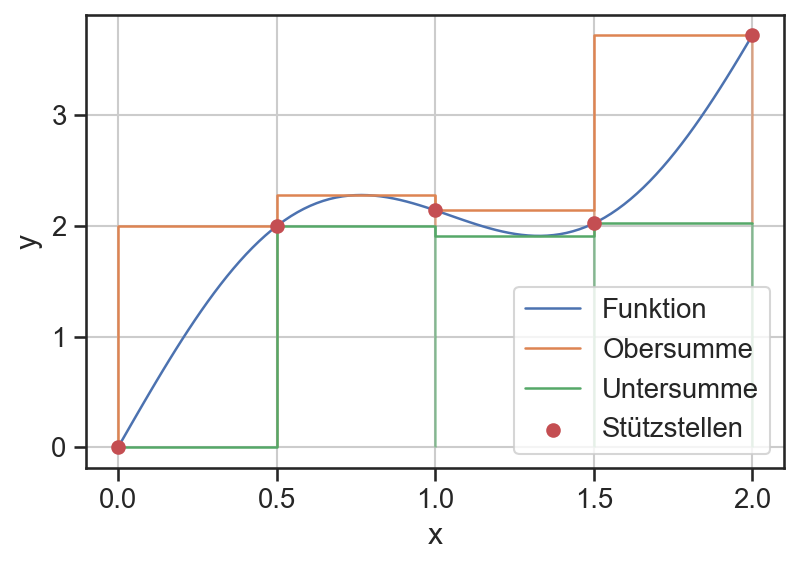

In [35]:
plt.plot(x, y, label='Funktion')
plt.scatter(xi, yi, label='Stützstellen', c='C3', zorder=3)
plt.plot(xi, oben, drawstyle='steps-pre', label='Obersumme')
plt.plot(xi, unten, drawstyle='steps-pre', label='Untersumme')

plt.vlines(xi, ymin=unten, ymax=oben, color='C1', alpha=0.6)
plt.vlines(xi, ymin=0, ymax=unten, color='C2', alpha=0.6)

plt.xlabel('x')
plt.ylabel('y')

plt.grid()
plt.legend();

Das obige Verfahren kann nun in einer Funktion zusammengefasst werden, welche die Summen der beiden Folgen zurückgibt.

In [59]:
def ou_summe(n, a=0, b=2):
    xi = np.linspace(a, b, n)
    yi = fkt(xi)
    dx = xi[1] - xi[0]
    
    sum_oben = 0
    sum_unten = 0
    
    for i in range(n-1): 
        cx = np.linspace(xi[i], xi[i+1], 50)
        cy = fkt(cx)
        oben = np.max(cy)
        unten = np.min(cy)
        sum_oben += dx * oben
        sum_unten += dx * unten
    
    return sum_oben, sum_unten

Für eine systematische Untersuchung des Konvergenzverhaltens, wird die Integrationsfunktion für verschiedene Anzahlen von Stützstellen aufgerufen.

In [60]:
n_max = 100
ns = np.arange(2, n_max, 1, dtype=np.int)
os = np.zeros(len(ns))
us = np.zeros(len(ns))


for i, n in enumerate(ns):
    o, u = ou_summe(n)
    os[i] = o
    us[i] = u

Die graphische Darstellung der beiden Summen zeigt eine kontinuierliche Annäherung dieser.

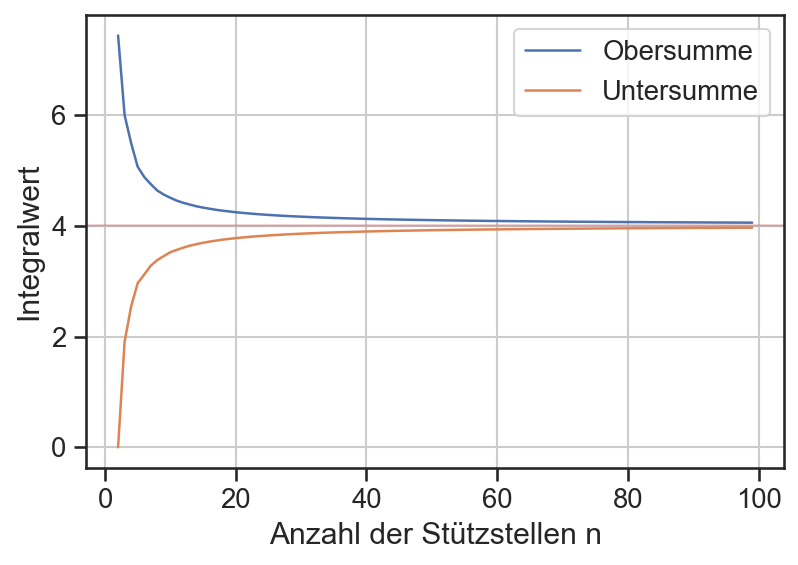

In [71]:
plt.plot(ns, os, label='Obersumme')
plt.plot(ns, us, label='Untersumme')

plt.axhline(y=I_exakt, color='C3', alpha=0.3)

plt.xlabel('Anzahl der Stützstellen n')
plt.ylabel('Integralwert')

plt.grid()
plt.legend();

Dies wird insbesondere deutlich, wenn die Differenz der beiden Summen aufgetragen wird. Mit einer logarithmischen Darstellung kann die kontinuierliche Annäherung auch quantitativ abgelesen werden.

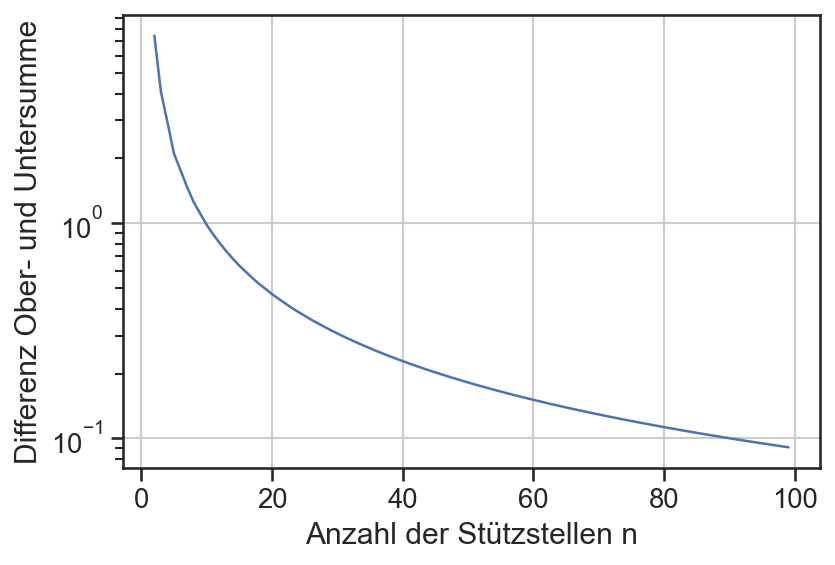

In [68]:
plt.plot(ns, os-us)

plt.xlabel('Anzahl der Stützstellen n')
plt.ylabel('Differenz Ober- und Untersumme')

# plt.xscale('log')
plt.yscale('log')

plt.grid();